In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("Data/Concrete_Data_Yeh.csv")

In [3]:
len(data)

1030

In [4]:
# We have *8 input features -
# except age feature all other feature's unit is Kg/m^3
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
data.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


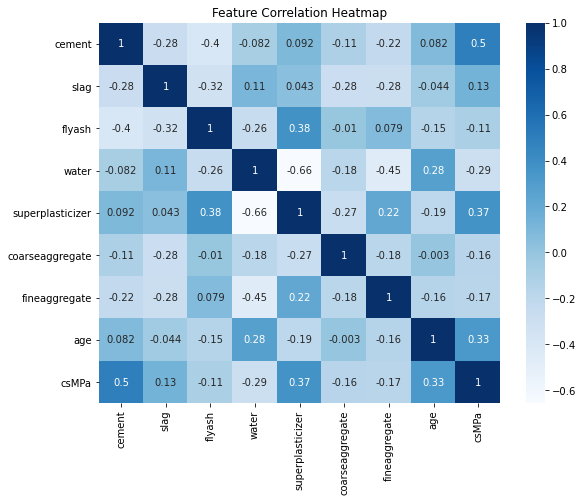

In [8]:
# To find relation between compressive strength and other features
# positive and high correlation means features are directly propotional and highly dependent
# negative correlation -- features are inversely propotional
corr = data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues') #annot -- an array of same data which is used to annotate the heatmap
#b, t = plt.ylim() # ylim- function that used to y-limits of current axes
#plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# our observation-
# 1) cement is highly correlated with strength (case for more strength)
# 2) after cement age and superplasticizer are strongly correlated
# 3) super plasticizer have negative correlation with water.

Text(0.5, 1.0, 'Compressive Strength Distribution')

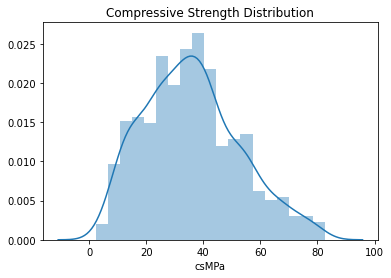

In [9]:
# for checking distribution of compressive strength -- we use distplot
ax = sns.distplot(data.csMPa)
ax.set_title("Compressive Strength Distribution")

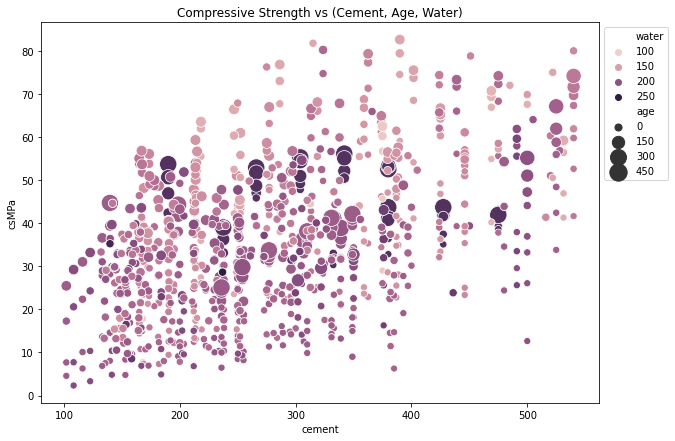

In [10]:
# Scatter plots show how much one variable is affected by another or correlation
# and we can also see other features ,how they are related

# hue-- grouping variable that will produce points with colors
# size-- grouping variable that will produce points with size

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="cement", hue="water", size="age", data=data, ax=ax, sizes=(50, 300) )
ax.set_title("Compressive Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()


#Observations-
# Compressive strength increases with amount of cement
# Compressive strength increases with age
# Cement with low age requires more cement for higher strength
# The older the cement is the more water it requires
# Concrete strength increases when less water is used in preparing it

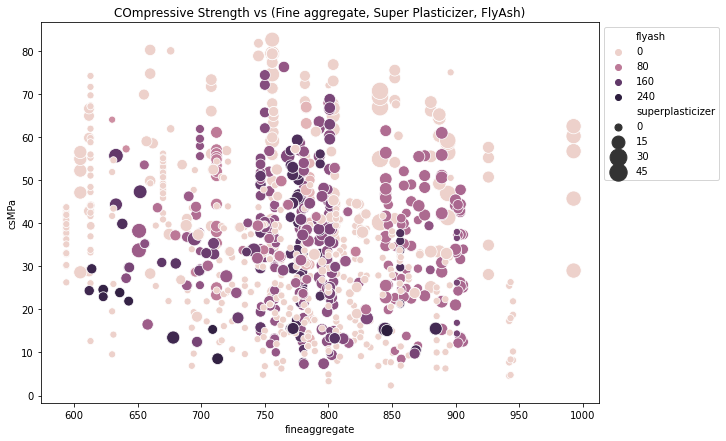

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="flyash", size="superplasticizer", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("COmpressive Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

# Observations
# As Flyash increases the strength decreases
# Strength increases with Super plasticize

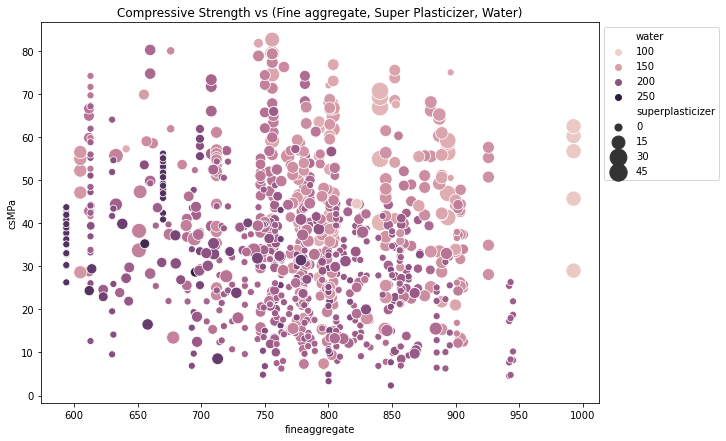

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="water", size="superplasticizer", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("Compressive Strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#Observations-
# Strength decreases with increase in water, strength increases with increase in Super plasticizer (already from above plots)
# More Fine aggregate is used when less water, more Super plasticizer is used

In [13]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
import xgboost
classifier =xgboost.XGBRegressor()
classifier.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
n_estimators = [ 100 , 500 , 900 , 1100 , 1500]
max_depth = [ 2, 3, 5 , 10 , 15]
booster = ['gbtree' ,'gblinear']
learning_rate = [0.05, 0.1 , 0.15, 0.20]
min_child_weight = [1,2,3,4]
base_score =[0.25 , 0.5, 0.75 , 1]



hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'booster' : booster,
    'learning_rate': learning_rate,
    'base_score': base_score,
    'min_child_weight': min_child_weight
}

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
random_cv = RandomizedSearchCV(classifier,
                               hyperparameter_grid,
                              cv=5 , n_iter = 50 , 
                              scoring = 'neg_mean_absolute_error', n_jobs = 4,
                              verbose = 5 ,
                              return_train_score = True , random_state = 42)

In [20]:
random_cv.fit(X_train , y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   29.0s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   39.8s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                          validate_parameters=1,
                                          verbosity=None),
                   n_it

In [21]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
 classifier =xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
classifier.fit(X_train , y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
y_pred_rfr = classifier.predict(X_test)

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier , open(filename , 'wb'))
pickle.dump(sc, open('scaler.pkl', 'wb'))

In [ ]:
loaded_mode = pickle.load(open(filename, 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

In [ ]:
new_input = [[318.8, 212.5 ,0.0,155.7,14.3,852.1,880.4,3]]

In [ ]:
X_test_scaled = scaler.transform(new_input)
new_output = loaded_mode.predict(X_test_scaled)
print(new_output)